In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scst
from sklearn.linear_model import LinearRegression

In [11]:
data = pd.read_csv("train.csv", header=0, parse_dates=True)

In [12]:
#Data Cleaning

In [13]:
# Taking data for store 1
# Filter when store == 1 and dropping Store column
Dataframe = pd.DataFrame(data)
Dataframe = Dataframe[Dataframe['Store'] == 1]
Dataframe = Dataframe.drop(['Store'], axis=1)

In [14]:
# Taking data for 10 departments
Dataframe = Dataframe[Dataframe['Dept'] < 11]

In [15]:
#filtered departmentwise data, taking data of 10 departments and making dataframe of each department
arrayOfDept = []
storeValue=1
iterate=len(Dataframe)
departData=[]
for i in range(iterate): 
    if(storeValue < 11):
        storeData = Dataframe[Dataframe['Dept'] == storeValue]
        storeData = storeData.drop(['Dept'], axis=1)
        arrayOfDept.append(storeData)
        storeValue = storeValue+1

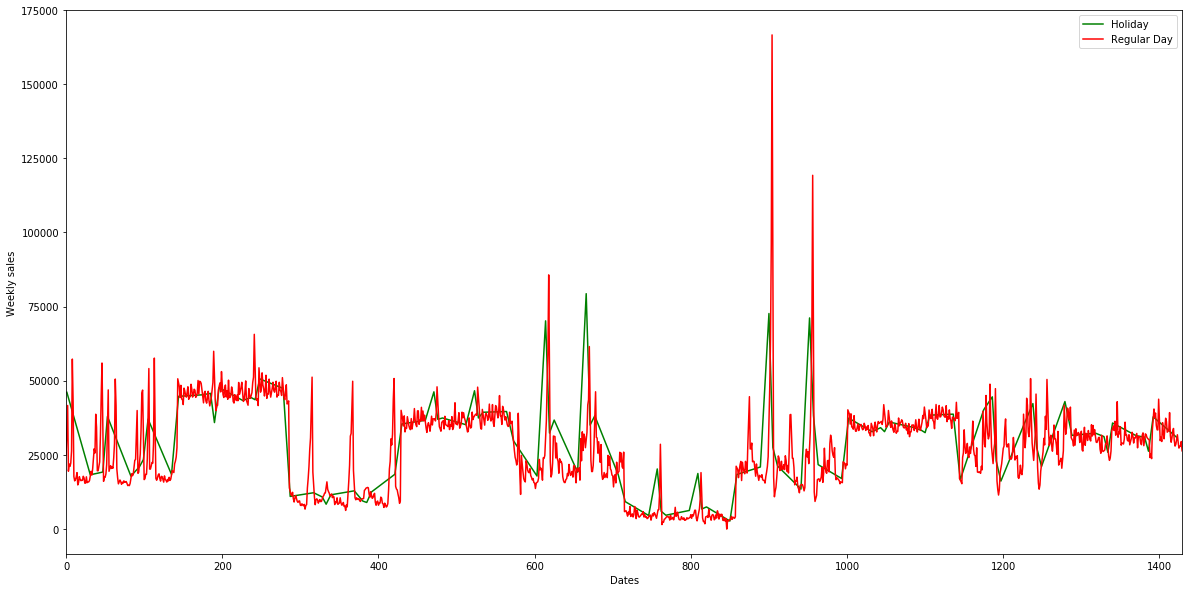

In [20]:
isHoliday = Dataframe

isHolidayTrue=isHoliday[isHoliday['IsHoliday'] == True]


isHolidayFalse=isHoliday[isHoliday['IsHoliday'] == False]

ax = plt.figure(figsize=(20,10)).gca()
plt.xlabel('Dates')
plt.ylabel('Weekly sales')

isHolidayTrue.plot(kind='line' ,color='green',y='Weekly_Sales',label='Holiday',ax=ax)
isHolidayFalse.plot(kind='line',color='red',y='Weekly_Sales',label='Regular Day',ax=ax)


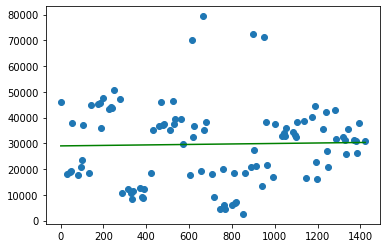

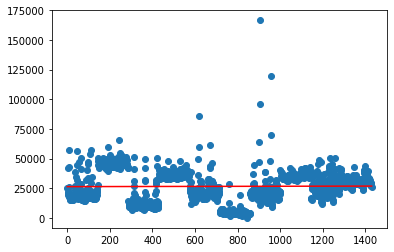

In [21]:
isHolidayTrue
XT = isHolidayTrue.index.values.reshape(-1, 1)
YT = isHolidayTrue['Weekly_Sales'].values.reshape(-1, 1)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(XT, YT)  # perform linear regression
Y_pred = linear_regressor.predict(XT)  # make predictions
plt.scatter(XT, YT)
plt.plot(XT, Y_pred, color='green')
plt.savefig('Graphs/Dept-regression-isholidayT')
plt.show()


XF = isHolidayFalse.index.values.reshape(-1, 1)
YF = isHolidayFalse['Weekly_Sales'].values.reshape(-1, 1)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(XF, YF)  # perform linear regression
Y_pred = linear_regressor.predict(XF)  # make predictions
plt.scatter(XF, YF)
plt.plot(XF, Y_pred, color='red')
plt.savefig('Graphs/Dept-regression-isholidayF')
plt.show()